In [128]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
Ticker = 'AAPL' , 'TSLA', 'GS', 'MSFT', 'BLK', 'BAC'
start = '2023-01-01'
end  = '2024-03-31'
data = yf.download(Ticker, start, end)['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [131]:
df = data.columns

In [132]:
df

Index(['AAPL', 'BAC', 'BLK', 'GS', 'MSFT', 'TSLA'], dtype='object', name='Ticker')

In [133]:
df = pd.DataFrame(data)

In [134]:
df

Ticker,AAPL,BAC,BLK,GS,MSFT,TSLA
Date,,,,,,
2023-01-03,124.216301,32.270802,687.817444,333.222717,237.036011,108.099998
2023-01-04,125.497498,32.877502,697.342041,334.647125,226.667297,113.639999
2023-01-05,124.166641,32.810093,677.384888,330.855011,219.949387,110.339996
2023-01-06,128.735214,33.137520,712.894409,335.012848,222.541550,113.059998
2023-01-09,129.261627,32.636749,727.374451,339.748138,224.708298,119.769997
...,...,...,...,...,...,...
2024-03-08,170.729996,35.599998,836.119995,386.989990,406.220001,175.339996
2024-03-11,172.750000,35.889999,825.159973,386.160004,404.519989,177.770004
2024-03-12,173.229996,35.959999,829.590027,388.179993,415.279999,177.539993


<Axes: xlabel='Date'>

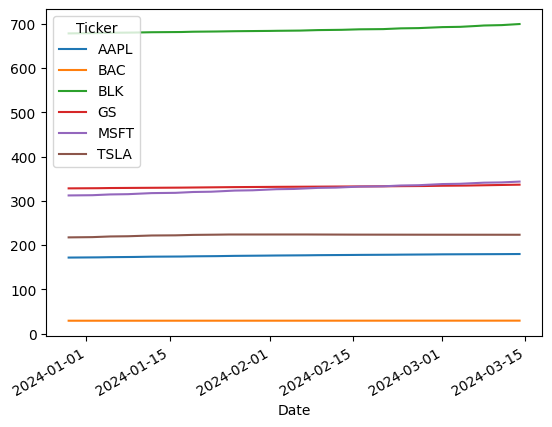

In [135]:
df.rolling(250).mean().plot()

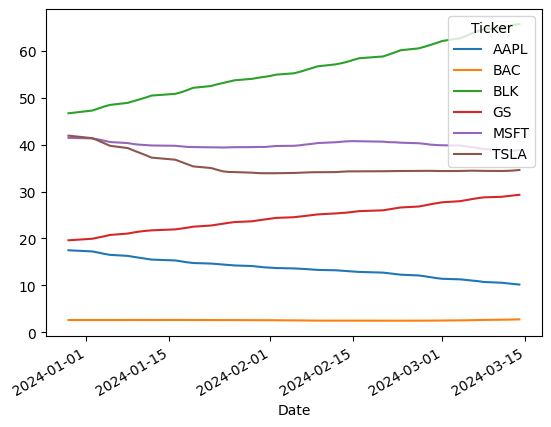

In [136]:
std = df.rolling(250).std().plot()

<Axes: xlabel='Date'>

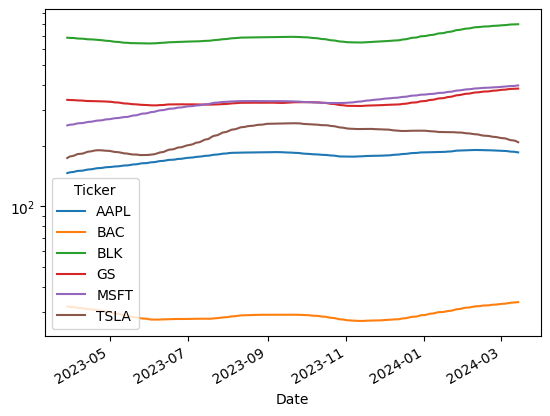

In [137]:
df.rolling(60).mean().plot(logy=True)

<Axes: xlabel='Date'>

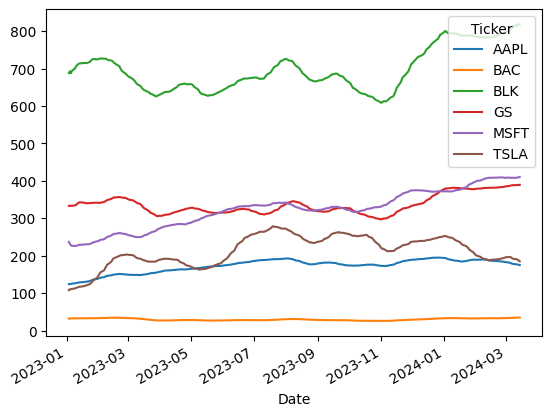

In [138]:
df.rolling('20D').mean().plot()

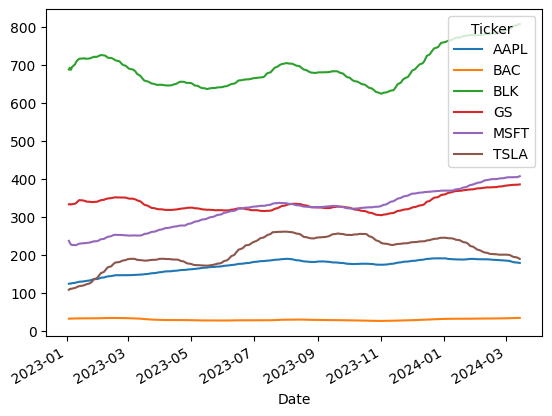

In [51]:
ewma60 = df.ewm(span=30).mean().plot()

In [139]:
Normalized = (df - df.mean()) / df.std()

In [140]:
Normalized

Ticker,AAPL,BAC,BLK,GS,MSFT,TSLA
Date,,,,,,
2023-01-03,-2.967059,0.756916,-0.163670,-0.154106,-1.777667,-2.681666
2023-01-04,-2.890483,0.964896,-0.009649,-0.102192,-1.982092,-2.541989
2023-01-05,-2.970028,0.941788,-0.332374,-0.240399,-2.114540,-2.625190
2023-01-06,-2.696968,1.054032,0.241847,-0.088863,-2.063434,-2.556612
2023-01-09,-2.665505,0.882365,0.476002,0.083718,-2.020715,-2.387437
...,...,...,...,...,...,...
2024-03-08,-0.186979,1.898184,2.234514,1.805487,1.557902,-0.986386
2024-03-11,-0.066245,1.997598,2.057281,1.775238,1.524386,-0.925120
2024-03-12,-0.037556,2.021594,2.128919,1.848858,1.736526,-0.930919


<Axes: xlabel='Date'>

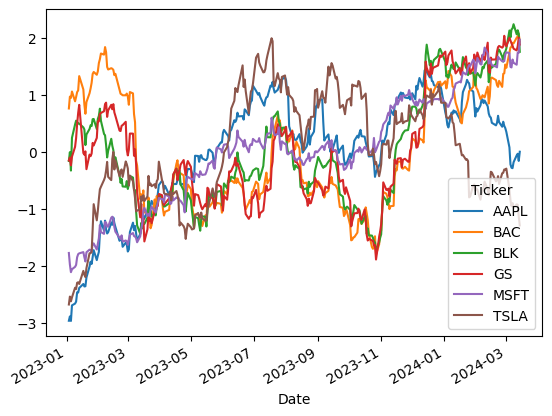

In [141]:
Normalized.plot()

In [142]:
rets = df.pct_change()

<Axes: xlabel='Date'>

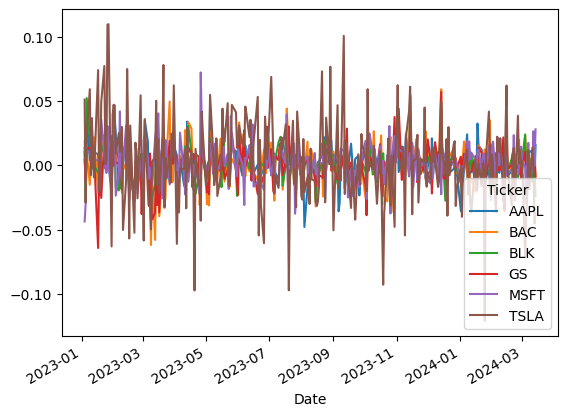

In [143]:
rets.plot()

In [144]:
symbols = '^SPX'
starts  = '2023-01-01'
ends = '2024-03-31'
stock = yf.download(symbols, starts, ends)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [145]:
stock

Date
2023-01-03    3824.139893
2023-01-04    3852.969971
2023-01-05    3808.100098
2023-01-06    3895.080078
2023-01-09    3892.090088
                 ...     
2024-03-08    5123.689941
2024-03-11    5117.939941
2024-03-12    5175.270020
2024-03-13    5165.310059
2024-03-14    5149.990234
Name: Adj Close, Length: 301, dtype: float64

In [146]:
returns = stock.pct_change()

In [147]:
returns

Date
2023-01-03         NaN
2023-01-04    0.007539
2023-01-05   -0.011646
2023-01-06    0.022841
2023-01-09   -0.000768
                ...   
2024-03-08   -0.006529
2024-03-11   -0.001122
2024-03-12    0.011202
2024-03-13   -0.001925
2024-03-14   -0.002966
Name: Adj Close, Length: 301, dtype: float64

In [148]:
corr = rets.rolling(125, min_periods=100).corr(returns)

In [149]:
corr.dropna()

Ticker,AAPL,BAC,BLK,GS,MSFT,TSLA
Date,,,,,,
2023-05-26,0.806065,0.614984,0.779218,0.590697,0.622854,0.557889
2023-05-30,0.804421,0.614969,0.778933,0.590750,0.622635,0.554447
2023-05-31,0.803983,0.617278,0.778911,0.593189,0.624375,0.551478
2023-06-01,0.805604,0.618490,0.781055,0.572092,0.625571,0.551551
2023-06-02,0.798936,0.627595,0.784901,0.580501,0.623074,0.554040
...,...,...,...,...,...,...
2024-03-08,0.620268,0.484631,0.677162,0.562914,0.655624,0.474456
2024-03-11,0.613341,0.483543,0.675380,0.566494,0.654398,0.476736
2024-03-12,0.608282,0.490488,0.675985,0.580147,0.657795,0.471476


# **Handing Missing**

In [153]:
missing_values = corr.isnull().sum()

In [154]:
missing_values[0:10]

Ticker
AAPL    100
BAC     100
BLK     100
GS      100
MSFT    100
TSLA    100
dtype: int64

In [155]:
total_cells = np.product(corr.shape)

In [156]:
total_missing = missing_values.sum()

In [157]:
total_missing

600

In [158]:
percent_missing = (total_missing/total_cells) * 100

In [159]:
corr.dropna()

Ticker,AAPL,BAC,BLK,GS,MSFT,TSLA
Date,,,,,,
2023-05-26,0.806065,0.614984,0.779218,0.590697,0.622854,0.557889
2023-05-30,0.804421,0.614969,0.778933,0.590750,0.622635,0.554447
2023-05-31,0.803983,0.617278,0.778911,0.593189,0.624375,0.551478
2023-06-01,0.805604,0.618490,0.781055,0.572092,0.625571,0.551551
2023-06-02,0.798936,0.627595,0.784901,0.580501,0.623074,0.554040
...,...,...,...,...,...,...
2024-03-08,0.620268,0.484631,0.677162,0.562914,0.655624,0.474456
2024-03-11,0.613341,0.483543,0.675380,0.566494,0.654398,0.476736
2024-03-12,0.608282,0.490488,0.675985,0.580147,0.657795,0.471476


<Axes: xlabel='Date'>

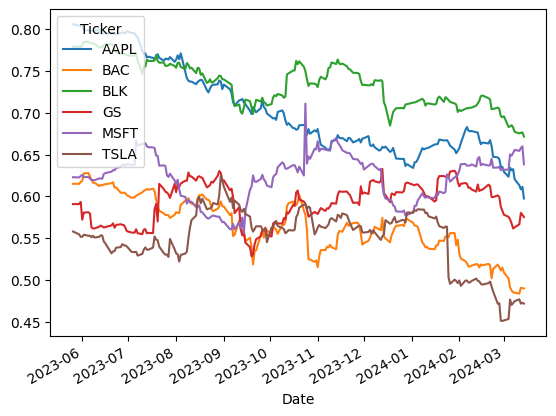

In [160]:
corr.plot()

In [162]:
dt[dt.columns[:6]].head()

,Adj Close
Date,
2023-01-03,3824.139893
2023-01-04,3852.969971
2023-01-05,3808.100098
2023-01-06,3895.080078
2023-01-09,3892.090088


In [163]:
dr = df.pct_change()

In [164]:
dr

Ticker,AAPL,BAC,BLK,GS,MSFT,TSLA
Date,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010314,0.018800,0.013848,0.004275,-0.043743,0.051249
2023-01-05,-0.010605,-0.002050,-0.028619,-0.011332,-0.029638,-0.029039
2023-01-06,0.036794,0.009979,0.052421,0.012567,0.011785,0.024651
2023-01-09,0.004089,-0.015112,0.020312,0.014135,0.009736,0.059349
...,...,...,...,...,...,...
2024-03-08,0.010237,-0.000842,0.005314,-0.003707,-0.007137,-0.018528
2024-03-11,0.011832,0.008146,-0.013108,-0.002145,-0.004185,0.013859
2024-03-12,0.002779,0.001950,0.005369,0.005231,0.026599,-0.001294


In [165]:
dy = (1 + dr).cumprod()

In [166]:
dy

Ticker,AAPL,BAC,BLK,GS,MSFT,TSLA
Date,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,1.010314,1.018800,1.013848,1.004275,0.956257,1.051249
2023-01-05,0.999600,1.016711,0.984832,0.992895,0.927915,1.020722
2023-01-06,1.036379,1.026858,1.036459,1.005372,0.938851,1.045883
2023-01-09,1.040617,1.011340,1.057511,1.019583,0.947992,1.107956
...,...,...,...,...,...,...
2024-03-08,1.374457,1.103164,1.215613,1.161355,1.713748,1.622017
2024-03-11,1.390719,1.112151,1.199679,1.158865,1.706576,1.644496
2024-03-12,1.394583,1.114320,1.206119,1.164927,1.751970,1.642368


In [167]:
dy_Max = dy.cummax()

In [168]:
dy_Max

Ticker,AAPL,BAC,BLK,GS,MSFT,TSLA
Date,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,1.010314,1.018800,1.013848,1.004275,0.956257,1.051249
2023-01-05,1.010314,1.018800,1.013848,1.004275,0.956257,1.051249
2023-01-06,1.036379,1.026858,1.036459,1.005372,0.956257,1.051249
2023-01-09,1.040617,1.026858,1.057511,1.019583,0.956257,1.107956
...,...,...,...,...,...,...
2024-03-08,1.592847,1.104094,1.215613,1.179932,1.770928,2.713599
2024-03-11,1.592847,1.112151,1.215613,1.179932,1.770928,2.713599
2024-03-12,1.592847,1.114320,1.215613,1.179932,1.770928,2.713599


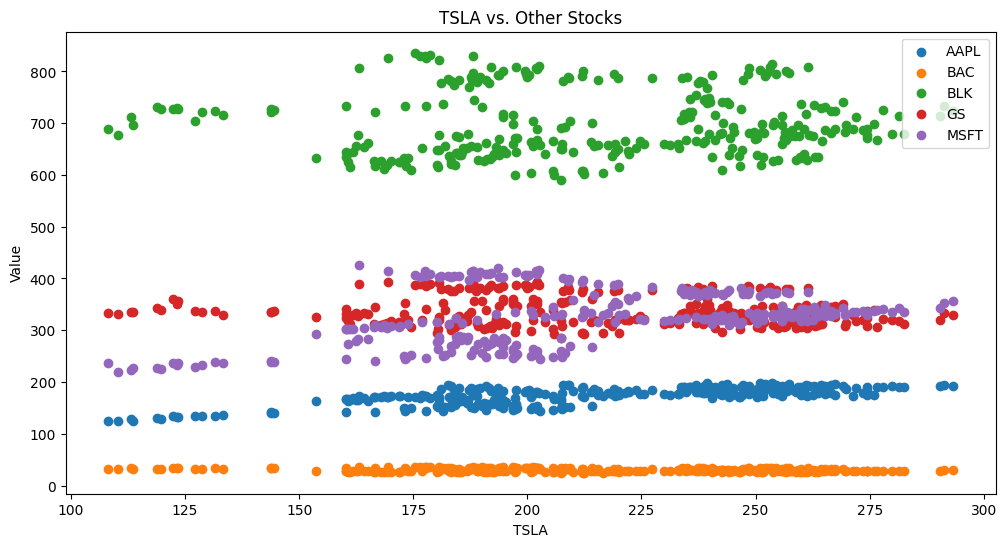

In [169]:
# @title TSLA vs. Other Stocks

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df['TSLA'], df['AAPL'], label='AAPL')
plt.scatter(df['TSLA'], df['BAC'], label='BAC')
plt.scatter(df['TSLA'], df['BLK'], label='BLK')
plt.scatter(df['TSLA'], df['GS'], label='GS')
plt.scatter(df['TSLA'], df['MSFT'], label='MSFT')

plt.xlabel('TSLA')
plt.ylabel('Value')
plt.title('TSLA vs. Other Stocks')
_ = plt.legend()

<Axes: xlabel='Date'>

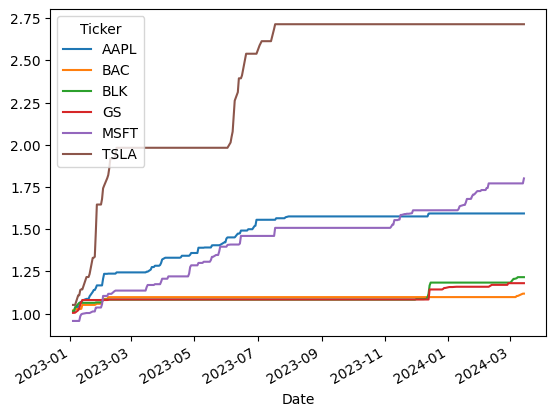

In [170]:
dy_Max.plot()

In [171]:
DrawDrown = (dy_Max - dy) / dy_Max

In [172]:
DrawDrown.dropna()

Ticker,AAPL,BAC,BLK,GS,MSFT,TSLA
Date,,,,,,
2023-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-05,0.010605,0.002050,0.028619,0.011332,0.029638,0.029039
2023-01-06,0.000000,0.000000,0.000000,0.000000,0.018202,0.005104
2023-01-09,0.000000,0.015112,0.000000,0.000000,0.008643,0.000000
2023-01-10,0.000000,0.008428,0.000000,0.000000,0.001091,0.007681
...,...,...,...,...,...,...
2024-03-08,0.137106,0.000842,0.000000,0.015743,0.032288,0.402264
2024-03-11,0.126897,0.000000,0.013108,0.017854,0.036338,0.393980
2024-03-12,0.124471,0.000000,0.007810,0.012717,0.010705,0.394764


<Axes: xlabel='Date'>

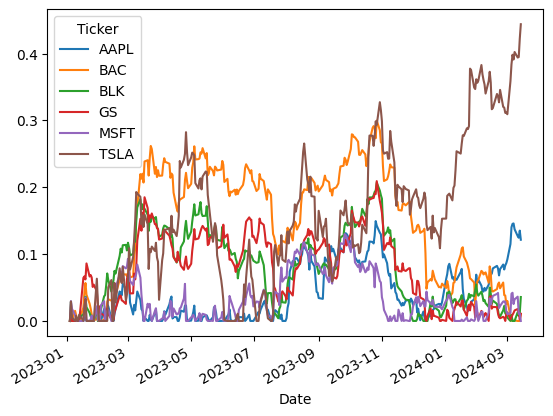

In [173]:
DrawDrown.plot()

In [174]:
max_drowdown = DrawDrown.max()

In [175]:
max_drowdown

Ticker
AAPL    0.149324
BAC     0.299750
BLK     0.206927
GS      0.209111
MSFT    0.129876
TSLA    0.443819
dtype: float64

<Axes: xlabel='Ticker'>

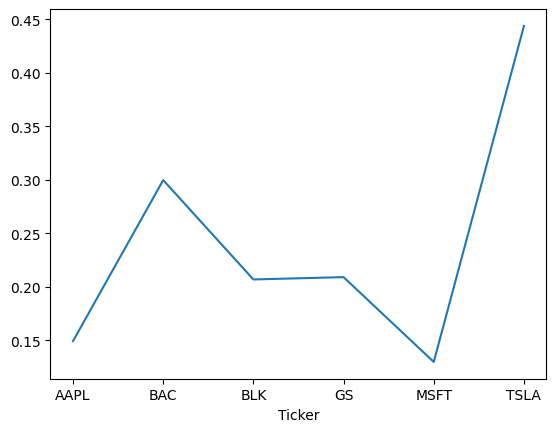

In [176]:
max_drowdown.plot()